# Web Scraping  

### An Introduction

**Web scraping** is the process of collecting and parsing raw data from the Web

**Note of caution:** Some websites explicitly forbid users from scraping their data with automated tools like the ones you’ll create in this tutorial. Websites do this for two possible reasons:

- The site has a good reason to protect its data. For instance, Google Maps doesn’t let you request too many results too quickly.
- Making many repeated requests to a website’s server may use up bandwidth, slowing down the website for other users and potentially overloading the server such that the website stops responding entirely.

## Before you start, inspect your data source
 ### - Explore the Website (using developers tools when necessary)
 ### - Decipher the Information in URLs
 
## Start scraping

## Explore the Website
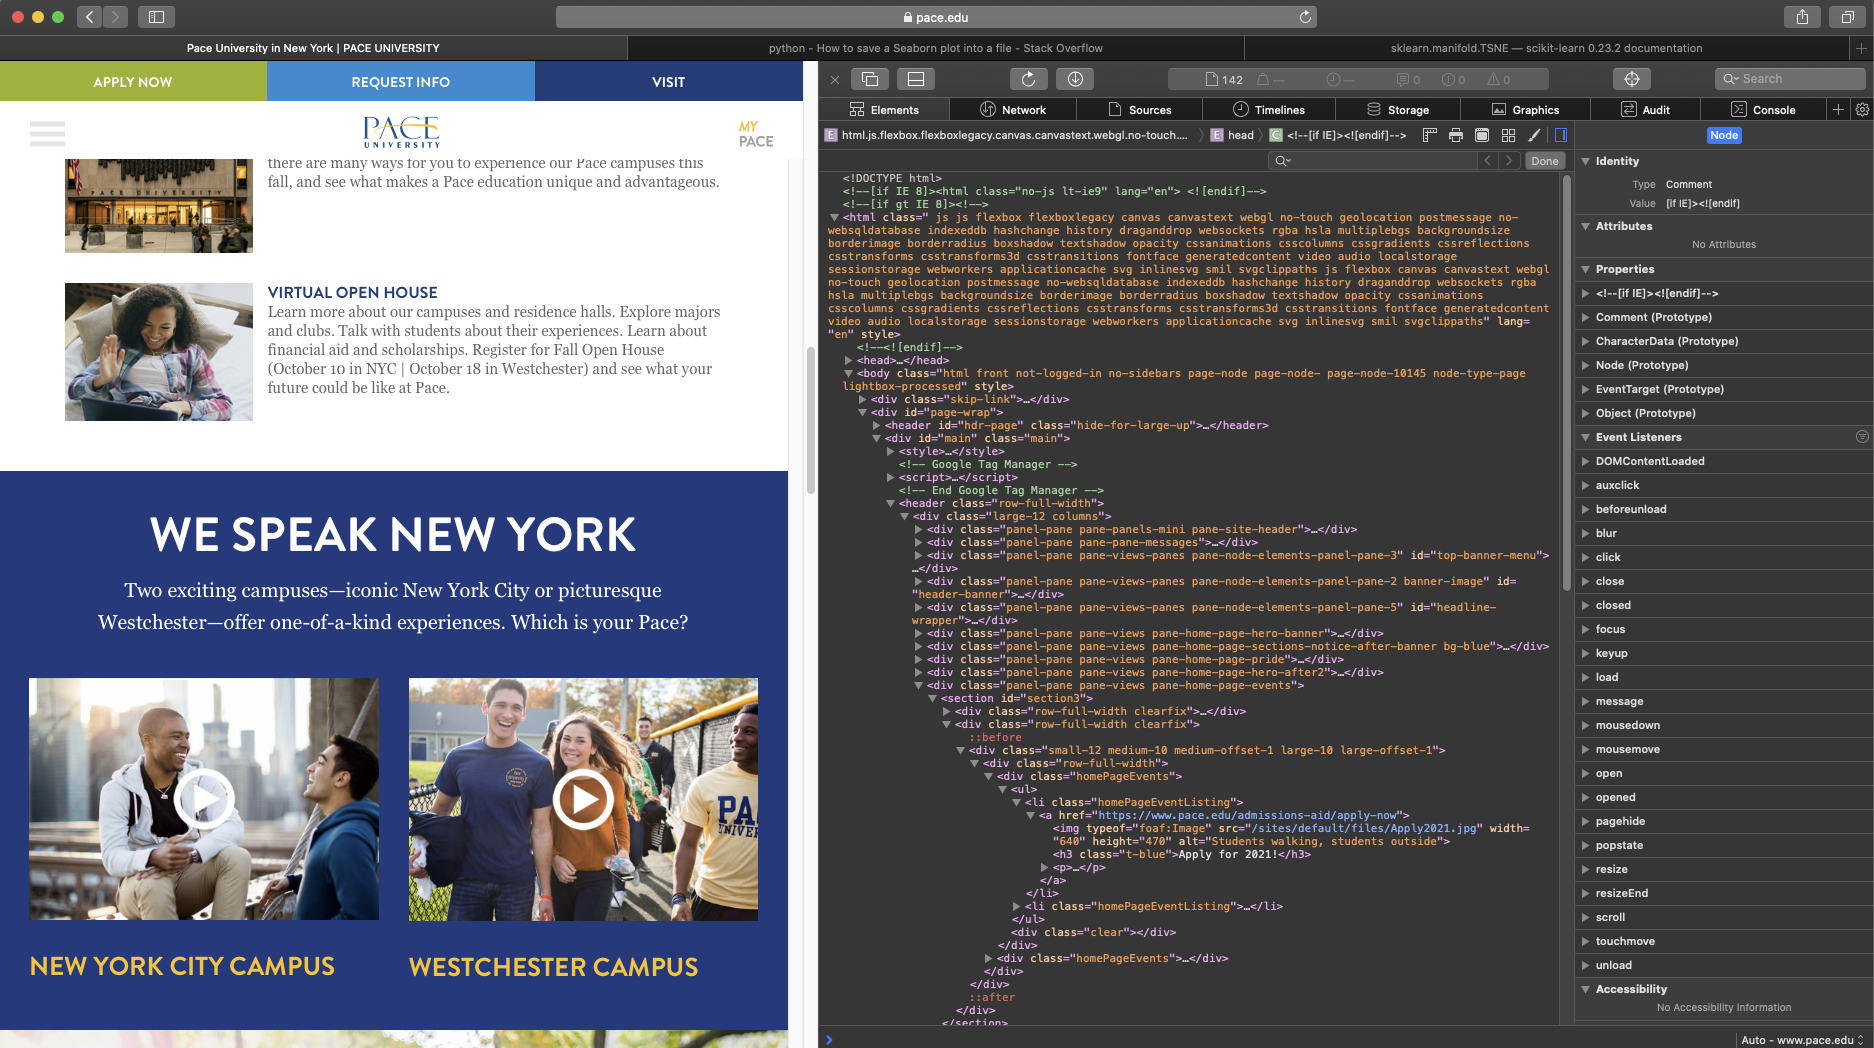

## Decipher the Information in URLs

- **The base** URL represents the path to the search functionality of the website. 

- **The query parameters** represent additional values that can be declared on the page. 

## Decipher the Information in URLs

**Example:** search results for Data Scientist positions in New York

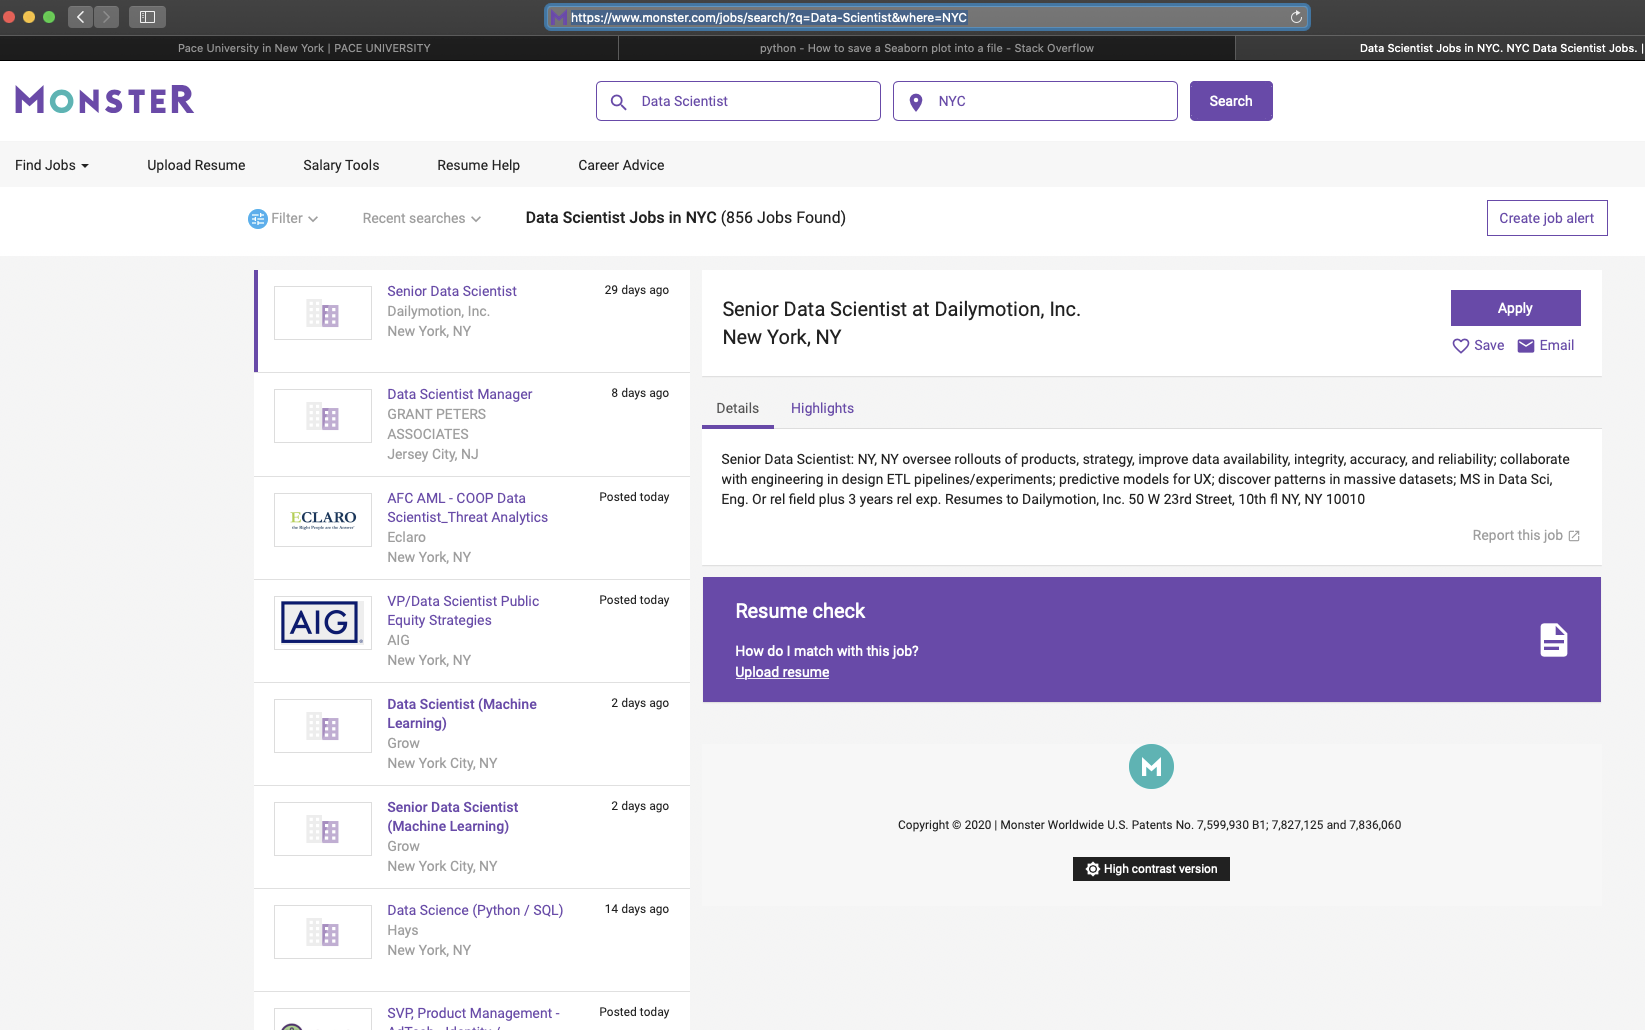

- Base query is `https://www.monster.com/jobs/search/`
- The query parameters are `?q=Data-Scientist&where=NY`

Query parameters generally consist of three things:


- **Start:** The beginning of the query parameters is denoted by a question mark (?).
- **Information:** The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).
- **Separator:** Every URL can have multiple query parameters, which are separated from each other by an ampersand (&).

## Creating a web scraper

### Connect to the webserver

In [2]:
#from urllib.request import urlopen
#!pip install requests
import requests

In [3]:
url = 'https://www.pace.edu'

In [4]:
page = requests.get(url)

In [34]:
page
#https://www.restapitutorial.com/httpstatuscodes.html

<Response [200]>

In [5]:
#html_byte= page.content
html_text=page.text

In [6]:
print(html_text)



<!DOCTYPE html>
<!--[if IE 8]><html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->
<head>
  <!--[if IE]><![endif]-->
<meta charset="utf-8" />
<meta http-equiv="ImageToolbar" content="false" />
<meta name="viewport" content="width=device-width" />
  <title>Pace University in New York | PACE UNIVERSITY</title>
  <link rel="stylesheet" href="/sites/default/files/advagg_css/css__tnrwGypIYJWCbSlfNhmaM1ljkZBHHMFhz0T3qbMP8lU__SLsLE8e8eXKQ24BTpPcm2fy_jPoWEE49KLMq3d5C-VE__ud7aeAcleAokSyAoP_l8KN4GW73ddEwgoYdsOdIyhOU.css" />
<style>.pane-home-page-hero-banner{background-image:url("/sites/default/files/homepage_2b_1920x930px_0.jpg");background-repeat:no-repeat;background-position:center center;background-attachment:scroll;}
</style>
<link rel="stylesheet" href="/sites/default/files/advagg_css/css__JhcId6hy_dP2N1P6GoTast2xx-C-MXhtbrD64qbKqpQ__WK1VXZs84Rsag0o9rKrK7IzaV9Dr3bJ2Nnay5sZQYIs__ud7aeAcleAokSyAoP_l8KN4GW73ddEwgoYdsOdIyhO

### Parsing source (html) into tags 
**What is the title of the page ?**

In [11]:
my_name='yegin'

In [39]:
my_name.find('in')

3

In [46]:
html_text[320:370]

'<title>Pace University in New York | PACE UNIVERSI'

In [43]:
html_text[html_text.find('<title>'):html_text.find('</title>')]

'<title>Pace University in New York | PACE UNIVERSITY'

In [47]:
start_tag=html_text.find('<title>')+len('<title>')
end_tag=html_text.find('</title>')

html_text[start_tag:end_tag]

'Pace University in New York | PACE UNIVERSITY'

In [25]:
start_of_title=html_text.find('<title>') + len('<title>')
end_of_title=html_text.find('</title>')

In [26]:
html_text[start_of_title:end_of_title]

'Pace University in New York | PACE UNIVERSITY'

### Getting all tags 

We can't know all the tags but we know how tags are formed "<" ">"

**Regular Expressiongs (review regular expression module)** can be extremely helpful in extracting part of text based on rules

In [8]:
import re
all_tags=re.findall(r'<.*?>',html_text)

In [9]:
set(all_tags)

{'<!--     <a href="http://bit.ly/2AkayDY">',
 '<!--     <a href="http://bit.ly/2Y5bB42">',
 '<!--     <a href="http://bit.ly/2mvHepn">',
 '<!--     <a href="http://bit.ly/2taDYOK">',
 '<!--     <a href="http://bit.ly/2z9xS4H">',
 '<!--     <a href="http://bit.ly/33xt1sm">',
 '<!--     <a href="http://bit.ly/vhLpH3">',
 '<!--     <a href="https://www.pace.edu/admissions-aid/undergraduate-admissions/transfer/welcome-transfer-undergraduates">',
 '<!--     <a href="https://www.pace.edu/college-health-professions/sections/explore-programs/graduate-programs?utm_source=pace-carousel&amp;utm_medium=website&amp;utm_content=admission">',
 '<!--     <a href="https://www.pace.edu/covid-dashboard">',
 '<!--     <a href="https://www.pace.edu/return-to-campus">',
 '<!--    </a>',
 '<!--   </a>',
 '<!--  <a href="https://www.pace.edu/admission-aid/customviewbook ">',
 '<!--  Quantcast Tag -->',
 '<!-- #page-wrap -->',
 '<!-- .nav-content -->',
 '<!-- End Facebook Pixel Code -->',
 '<!-- End Google Ta

### Getting all links 

- what is the html tag for links ? 
- how can we represent it as a Regular expression ?
- how can we clean the tags ? 

In [7]:
all_links=re.findall(r'<a .*/a>',html_text)

NameError: name 're' is not defined

In [1]:
all_links

NameError: name 'all_links' is not defined

In [56]:
[re.findall( r'>.*<' ,x)[0][1:-1] for x in all_links]

['Skip to main content',
 'Apply Now',
 'Request Info',
 'Visit',
 '<img src="/sites/all/themes/pace7r/images/logo-sm.png" alt="Pace University" class="logo-pace">',
 '<span>college of health professions</span> ',
 '<span>seidenberg school of csis</span> ',
 'Search ',
 'NYC<br />Campus</a></li><li class="leaf menu-mlid-7117 dhtml-menu t-green" id="dhtml_menu-7117"><a href="/westchester" class="t-green">Westchester<br />Campus</a></li><li class="last leaf menu-mlid-10260 dhtml-menu t-yellow" id="dhtml_menu-10260"><a href="https://online.pace.edu/" class="t-yellow" target="_blank">Online<br />Education',
 'About Pace</a></li><li class="leaf menu-mlid-7116 dhtml-menu" id="dhtml_menu-7116"><a href="/news">News</a></li><li class="leaf menu-mlid-7119 dhtml-menu" id="dhtml_menu-7119"><a href="/university-calendar">Events</a></li><li class="leaf menu-mlid-7113 dhtml-menu schools-toggle" id="dhtml_menu-7113"><a href="/colleges-and-schools" class="util-schools">Schools</a></li><li class="leaf m

### Process Each Tag

In [58]:
def clean_tag(source):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', source)

def get_href(source):
    href_regex= re.compile('href=".*?"')
    href=re.findall(href_regex, source)
    #print(href)
    if len(href)>0:
        return  href[0][6:-1]
    else:
        return ''
    
def get_link_text(source):
    href_text_regex=re.compile(r'>.*<')
    href=re.findall(href_text_regex, source)
    if len(href)>0:
        return clean_tag(href[0][1:-1])
    else: 
        return ''

In [59]:
[ (get_link_text(link),get_href(link) ) for link in all_links]

[('Skip to main content', '#main-content'),
 ('Apply Now',
  'https://www.pace.edu/admissions-aid/apply-now?utm_source=homepage&utm_medium=top-navigation&utm_campaign=top-navigation&utm_term=top-navigation&utm_content=apply-now'),
 ('Request Info',
  'https://www.pace.edu/admissions-aid/request-information?utm_source=homepage&utm_medium=top-navigation&utm_campaign=top-navigation&utm_content=request-info'),
 ('Visit',
  'https://www.pace.edu/admissions-aid/undergraduate-admissions/freshman/campus-tours-events?utm_source=homepage&utm_medium=top-navigation&utm_campaign=top-navigation&utm_content=visit'),
 ('', ''),
 ('college of health professions ',
  'https://www.pace.edu/college-health-professions'),
 ('seidenberg school of csis ', 'https://www.pace.edu/seidenberg'),
 ('Search ', '#'),
 ('NYCCampusWestchesterCampusOnlineEducation', '/nyc'),
 ('About PaceNewsEventsSchoolsA to ZSearchApply NowRequest InfoVisit',
  '/about-us/all-about-pace'),
 ('', '/'),
 ('Academics at Pace', '/academic